# DS 3000 - Assignment 4

**Student Name**: Lauren Li

**Date**: 05/13/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [3]:
#run this cell to install the fast parquet library
!pip install fastparquet

## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [5]:
#import pandas
import pandas as pd

#let's load the data into a dataframe
tripdata_df = pd.read_parquet(path = 'green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

#Note: you'll notice two new things. 1) We are using a new function called `read_parquet()` which indicates that we are 
#      reading data in parquet format. 2) We used the fastparquet library as the engine. 
#      That's it! Pandas will load the data into a dataframe. You can now use the dataframe for EDA.

# Reminder: How does Pandas read other file formats?
# 1. Excel files: pd.read_excel()
# 2. CSV Files: pd.read_csv()
# ... and now you know how to read parquet files using pd.read_parquet()


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [7]:
#2.1
#prints dimensions of the data
print("Dimensions:", tripdata_df.shape)

#print out the first 5 rows of the data; make sure it imported properly
print(tripdata_df.head())

#prints datatype of each column
print(tripdata_df.info())

Dimensions: (64809, 20)
   VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       1.0  2023-02-01 00:46:22   2023-02-01 01:05:57                  N   
1       2.0  2023-02-01 00:05:09   2023-02-01 00:22:42                  N   
2       2.0  2023-02-01 00:03:47   2023-02-01 00:27:30                  N   
3       2.0  2023-01-31 23:30:56   2023-01-31 23:51:40                  N   
4       2.0  2023-02-01 00:15:05   2023-02-01 00:26:02                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0          74.0         265.0              1.0          10.80   
1         1.0         216.0         196.0              1.0           4.76   
2         1.0           7.0         114.0              1.0           6.32   
3         1.0          74.0         239.0              1.0           3.50   
4         1.0          82.0         223.0              1.0           3.14   

   fare_amount  extra  mta_tax  tip_amount  tolls_

It can be seen from the above results that the dimensions are 64809 x 20 and that pandas has already given each column a certain datatype. However, this isn't necessarily the best datatype for each variable. Here is a list of what each variable's datatype should be (only the ones that need changing are listed here):

VendorID: category

store_and_fwd_flag: category

RatecodeID: category

PULocationID: int64

DOLocationID: int64

passenger_count: int64

payment_type: category

trip_type: category

Reasonings:
For VendorID, RatecodeID, payment_type, and trip_type, even though they are written into the columns as floats/numbers, according to the variable definitions, they each refer to a specific option that has been defined. As such, it wouldn't make sense to leave them as the original float64 datatype (decimals are definitely not included in their data definitions), and not every can be included. 

store_and_fwd_flag should be stored as categorical data, as there are only really 3 options- yes, no, and unknown and it would makes sense to leave it as an object.

Additionally, passenger_count should be stored as an integer, as it wouldn't make sense to have decimals of passengers. However, since we have still have null data within that column it can't quite be fixed in the next step yet.

Lastly, for the PULocationID, and DOLocationID, they utilize taxi zone numbers which are populated using integers between 1-263 (with values of 264 and 265 corresponding to unknown and outside of NYC respectively) according to this [source](https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf) that was found on [Kaggle](https://www.kaggle.com/datasets/mxruedag/tlc-nyc-taxi-zones). Meaning, it makes more sense to have this variable stored as an integer. The argument for storing them as the category datatype could also be made, but with over 200 possible options, it makes more sense to place restrictions on decimal placements. 

In [9]:
#2.2
# convert variables mentioned above to suitable types
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['PULocationID'] = tripdata_df['PULocationID'].astype('int64')
tripdata_df['DOLocationID'] = tripdata_df['DOLocationID'].astype('int64')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype('category')

Note: passenger_count has not been converted into an integer type yet, as there is some invalid data to be cleaned in the next few steps

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [12]:
# print the value count of VendorID and RatecodeID
print(tripdata_df['VendorID'].value_counts())
print(tripdata_df['RatecodeID'].value_counts())

VendorID
2.0    56249
1.0     8560
Name: count, dtype: int64
RatecodeID
1.0     57911
5.0      1828
2.0       154
4.0        51
3.0        38
99.0        5
6.0         1
Name: count, dtype: int64


Yes, there is categorical data within this dataset. This includes the variable RatecodeID and VendorID as shown above. It can be seen within the value counts above that both of these variables have values that don't really vary. This makes sense when taking the [data dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf) into account. According to the data dictionary, for VendorID, there are only three possible options, 1, 2, and 6, that correspond to a specific vendor. Similarly, RatecodeID will only have the values 1-6, or 99 which correspond to a specific rate code that is in effect (99 represents unknown in this case). Since both of these variables are group by distinct categories and have limited possible values, it makes sense to consider then as categorical variables. Additionally, both VendorID and RatecodeID are nominal variables, as the values, although corresponding to a specific thing, don't correspond to any particular ranking, making them both nominal variables.

## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

In [15]:
#4.1
#Find number of null values in each column within the data frame
print(tripdata_df.isnull().sum())

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4821
RatecodeID                4821
PULocationID                 0
DOLocationID                 0
passenger_count           4821
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64809
improvement_surcharge        0
total_amount                 0
payment_type              4821
trip_type                 4826
congestion_surcharge      4821
dtype: int64


The missing values within the data set is a widespread issue. Out of the 20 columns, there are 6 columns that contain missing values. From the data, even in a single column such as payment_type or trip_type have 4821 and 4826 missing values respectively. Additionally, the entirety of ehail_fee does not contain any values. These missing values seem to be missing at random (MAR), there could be some relationship between the missing variables, but there is nothing in the column that would indicate a particular reason that the data is missing

In [17]:
#4.2
#Find number of null values per row
print(tripdata_df.isnull().sum(axis=1).sort_values(ascending=False))

64808    7
61588    7
61590    7
61591    7
61592    7
        ..
21609    1
21610    1
21611    1
21612    1
32404    1
Length: 64809, dtype: int64


By, printing out how many values each row is missing, it can be seen that quite a few rows have 7 missing values and each row has at least one (coming from the ehail_fee column). This is not good for the dataset, and the data will have to be cleaned.

There are a few ways I would like to handle this missing data. 

First of all, I would like to straight up delete the ehail_fee column, as there are no values that have been logged as part of its data. As such, it doesn't really make sense to analyze anything in terms of the ehail_fee column because there is *no data to analyze*. Therefore, the ehail_fee column will be deleted.

Another thing that I would like to delete are all the rows that have greater than 4 null values, as those are rows that have multiple missing values and it is best to get rid of them.

In [19]:
#4.3
#Handle missing data-deletion
#Deletes "ehail_fee" column
tripdata_df.drop('ehail_fee', axis=1, inplace=True)

#Deletes rows with 4 or more null values
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 4]

print(tripdata_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59988 entries, 0 to 59987
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59988 non-null  category      
 1   lpep_pickup_datetime   59988 non-null  datetime64[us]
 2   lpep_dropoff_datetime  59988 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  category      
 4   RatecodeID             59988 non-null  category      
 5   PULocationID           59988 non-null  int64         
 6   DOLocationID           59988 non-null  int64         
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          59988 non-null  float64       
 9   fare_amount            59988 non-null  float64       
 10  extra                  59988 non-null  float64       
 11  mta_tax                59988 non-null  float64       
 12  tip_amount             59988 non-null  float64       
 13  tolls_

In [20]:
#Check dimensions of the dataframe
print('New Dimensions: ', tripdata_df.shape)
#Check how much null data there is again
print(tripdata_df.isnull().sum(axis=1).sort_values(ascending=False))

New Dimensions:  (59988, 19)
39622    1
58313    1
19276    1
39044    1
10068    1
        ..
20001    0
20002    0
20003    0
20004    0
59987    0
Length: 59988, dtype: int64


The larger parts of the data has been cleaned. Although there are still some null values here and there , it is definitely a lot better than before, and will make data exploration much easier

In [22]:
#Fix datatype of passenger_count
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype('int64')

The above code fixes the datatype of passenger count, as we previously were not able to do so because of all the null data that has since been cleaned. 

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found.
2. write suitable code to handle the invalid data that you found.

In [25]:
#5.1
#Get described data to see some more information about the data frame
tripdata_df.describe(include='all')

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,59988.0,59988,59988,59988,59988.0,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.000000,59988.0,59983.0,59988.000000
unique,2.0,NaN,NaN,2,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN
top,2.0,NaN,NaN,N,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
freq,51542.0,NaN,NaN,59779,57911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38549.0,58270.0,NaN
mean,NaN,2023-02-14 20:00:37.047243,2023-02-14 20:18:01.719027,NaN,NaN,98.996866,138.832633,1.294792,2.703820,16.248762,0.910920,0.616240,2.069589,0.149456,0.949873,21.444178,NaN,NaN,0.733793
min,NaN,2008-12-31 23:02:29,2009-01-01 16:41:01,NaN,NaN,1.000000,1.000000,0.000000,0.000000,-67.000000,-2.500000,-0.500000,-0.900000,-6.550000,-1.000000,-68.000000,NaN,NaN,-2.750000
25%,NaN,2023-02-08 01:04:49,2023-02-08 01:45:47.500000,NaN,NaN,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.620000,NaN,NaN,0.000000
50%,NaN,2023-02-14 20:08:20,2023-02-14 20:21:01,NaN,NaN,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.500000,0.000000,1.000000,17.700000,NaN,NaN,0.000000
75%,NaN,2023-02-21 22:21:02,2023-02-21 22:38:29.250000,NaN,NaN,129.000000,219.000000,1.000000,3.100000,19.100000,2.500000,0.500000,3.270000,0.000000,1.000000,25.750000,NaN,NaN,2.750000
max,NaN,2023-03-01 00:01:06,2023-03-01 16:51:02,NaN,NaN,265.000000,265.000000,9.000000,6470.330000,440.000000,7.500000,4.250000,80.000000,45.350000,1.000000,441.000000,NaN,NaN,2.750000


In [26]:
#See if there are doubles within the data
print(tripdata_df.duplicated().sort_values())

0        False
39985    False
39986    False
39987    False
39988    False
         ...  
20000    False
20001    False
20002    False
19990    False
59987    False
Length: 59988, dtype: bool


In [81]:
#Check for any null values within data
print(tripdata_df.isnull().sum().sort_values(ascending=False))

VendorID                 0
extra                    0
trip_type                0
payment_type             0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
fare_amount              0
lpep_pickup_datetime     0
trip_distance            0
passenger_count          0
DOLocationID             0
PULocationID             0
RatecodeID               0
store_and_fwd_flag       0
lpep_dropoff_datetime    0
congestion_surcharge     0
dtype: int64


In [83]:
#Look at the null values within trip_data
print(tripdata_df['trip_type'].isnull().sort_values())

0        False
39983    False
39984    False
39985    False
39986    False
         ...  
20012    False
20013    False
20014    False
20002    False
59986    False
Name: trip_type, Length: 59954, dtype: bool


Above, the trip data was described, and got pandas to check for any duplicates within the data (there was none). However, from describing the data, there were some issues that came to light.

Three issues:

1. There are somehow negative fare amounts, tip amounts, tolls amounts, total amount, and mta taxes  as shown by the min value of said categories. It doesn't make sense for payments to be negative in this case, so these invalid pieces of data need to be rectified.
2. Additionally, there seems to be some dates within lpep_pickup_datetime and lpep_dropoff_datetime that aren't in the correct date range, as this data is supposed to come from February 2023. When describing the data, it can be seen that there is a max value that is in March (wrong month) and a min value that in the wrong year of 2008/2009.
3. Lastly, there are still some unknown values left within the trip_type column (5 to be exact) and should be cleaned as well.

In [87]:
#5.2
#Dealing with negative payments in all columns
tripdata_df.loc[tripdata_df['fare_amount'] < 0, 'fare_amount'] = tripdata_df['fare_amount'].mean()

tripdata_df.loc[tripdata_df['tip_amount'] < 0, 'tip_amount'] = tripdata_df['tip_amount'].mean()

tripdata_df.loc[tripdata_df['tolls_amount'] < 0, 'tolls_amount'] = tripdata_df['tolls_amount'].mean()

tripdata_df.loc[tripdata_df['mta_tax'] < 0, 'mta_tax'] = tripdata_df['mta_tax'].mean()

tripdata_df.loc[tripdata_df['total_amount'] < 0, 'total_amount'] = tripdata_df['total_amount'].mean()

#Check if there are still negative payments
print(tripdata_df.loc[tripdata_df['fare_amount'] < 0, 'fare_amount'])
print(tripdata_df.loc[tripdata_df['tip_amount'] < 0, 'tip_amount'])
print(tripdata_df.loc[tripdata_df['tolls_amount'] < 0, 'tolls_amount'])
print(tripdata_df.loc[tripdata_df['mta_tax'] < 0, 'mta_tax'])
print(tripdata_df.loc[tripdata_df['total_amount'] < 0, 'total_amount'])


Series([], Name: fare_amount, dtype: float64)
Series([], Name: tip_amount, dtype: float64)
Series([], Name: tolls_amount, dtype: float64)
Series([], Name: mta_tax, dtype: float64)
Series([], Name: total_amount, dtype: float64)


In [89]:
#Dealing with invalid dates
tripdata_df = tripdata_df.loc[
    (tripdata_df['lpep_pickup_datetime'] > '2023-01-31') & 
    (tripdata_df['lpep_pickup_datetime'] < '2023-03-01')]
#Check if there is any invalid dates left
print(tripdata_df.loc[
    (tripdata_df['lpep_pickup_datetime'] <= '2023-01-31') |
    (tripdata_df['lpep_pickup_datetime'] >= '2023-03-01'),
    'lpep_pickup_datetime'])

tripdata_df = tripdata_df.loc[
    (tripdata_df['lpep_dropoff_datetime'] > '2023-01-31') & 
    (tripdata_df['lpep_dropoff_datetime'] < '2023-03-01')]
#Check if there is any invalid dates left
print(tripdata_df.loc[
    (tripdata_df['lpep_dropoff_datetime'] <= '2023-01-31') |
    (tripdata_df['lpep_dropoff_datetime'] >= '2023-03-01'),
    'lpep_dropoff_datetime'])

#Take a look at the dimensions of our data at this point
print(tripdata_df.shape)

Series([], Name: lpep_pickup_datetime, dtype: datetime64[us])
Series([], Name: lpep_dropoff_datetime, dtype: datetime64[us])
(59954, 19)


In [32]:
#Dealing with unknown values left in trip_type column
tripdata_df['trip_type'].fillna(tripdata_df['trip_type'].mode()[0], inplace=True)
#Check for any null values
print(tripdata_df['trip_type'].isnull().sort_values())

0        False
39983    False
39984    False
39985    False
39986    False
         ...  
20012    False
20013    False
20014    False
20002    False
59986    False
Name: trip_type, Length: 59954, dtype: bool


1. The negative payments in fare_amount, tip_amount, toll_amount, mta_tax, and total_amount was rectified by taking the mean of the data and implementing that as the their entries instead.
2. For the dates that were not within the proper range, it makes more sense to just delete their corresponding rows, as they are not in the proper range of data that the data originally said it was. 
3. The leftover unknown values within the trip_type column was fixed by taking the mode of the data for that, and setting those unknown values to the mode. This makes sense, as there were only 5 values that were missing (not a huge chunk) and it could be surmised that the data would continue to follow the trend especially since around 97% of the data was the mode of the data (taken from the table after using df.describe()).

<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

Axes(0.125,0.11;0.775x0.77)


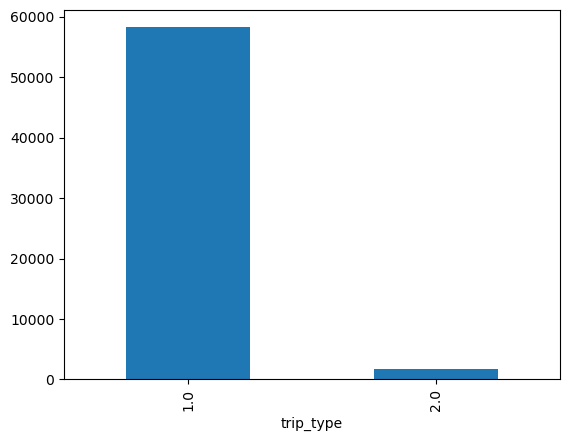

In [108]:
#6.1
#Display the trip type in a bar chart
print(tripdata_df['trip_type'].value_counts().plot(kind='bar'))

This chart shows how a New Yorker typically gets a cab. The x-asis represents the trip_type, or how the New Yorker requested a cab. The y-axis represents the number of these requests for each type, going in increments of 10,000.

The x-axis trip_type refers to how New Yorkers typically request/hail a cab. Although the data shows either 1 or 2, each options refers to a specific option according to the data dictionary:

1- street-hail (the customer flags down the cab from the street)

2- dispatch (the customer reserves the cab beforehand)

From this bar chart, it can be seen that the most common way New Yorkers request a cab is through street-hail, with the numbers varying wildly between the two options. For street-hailing, there are over 50,000 requests compared to dispatch with less than 10,000. Thinking of this data within the context of a bustling city such as New York, the data also makes sense, as a lot of people would probably hailing cabs from the streets for day-to-day activities, or simple conveniences.

Axes(0.125,0.11;0.775x0.77)


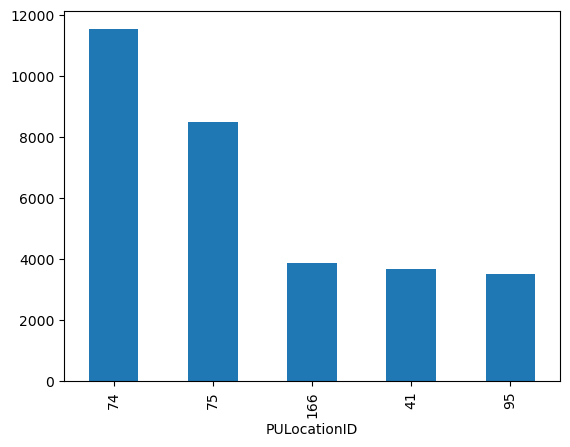

In [106]:
#6.2
#Display top five common pick-up locations as a bar chart
print(tripdata_df['PULocationID'].value_counts().head().plot(kind='bar'))

The chart above represents the 5 most common pick up locations for taxis. The y-axis goes by every 2,000 trips while the x-axis represents the IDs of taxi locations. 

From the chart above, it can be seen that the most common pick up location IDs are 74, 75, 166, 41, and 95 with 74 being the most common by a long shot. Using the taxi zone lookup table from [TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page) the area that each ID corresponds to can be found. 

1. 74 - Manhattan (East Harlem North)
2. 75 - Manhattan (East Harlem South)
3. 166 - Manhattan (Morningside Heights)
4. 41 - Manhattan (Central Harlem)
5. 95 - Queens (Forest Hills)

After matching location IDs with respective locations, it can be seen that most of the pick up locations are in Manhattan. This data shows how popular a pickup location in Manhattan is. Looking at the data, perhaps there is other data on attractions within NYC, or data showing general annual incomes within NYC, that could possible coincide with this taxi data, giving possible reasoning as to why so many of the taxi pickups are in Manhattan. 

Axes(0.125,0.11;0.775x0.77)


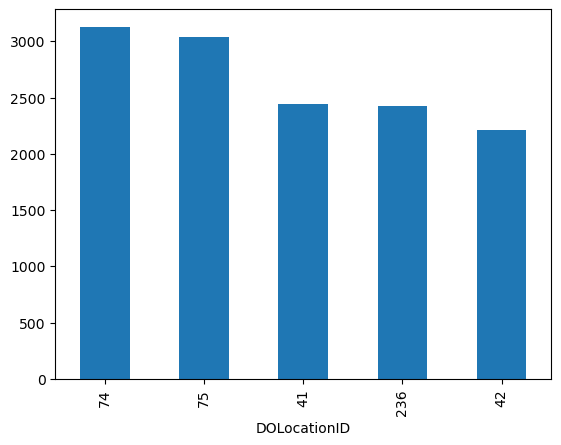

In [104]:
#6.3
#Display top five common drop-off locations as a bar chart
print(tripdata_df['DOLocationID'].value_counts().head().plot(kind='bar'))

The chart above represents the 5 most common drop off locations for taxis. The y-axis goes by every 500 trips while the x-axis represents the IDs of taxi locations. 

Similar to the pick up locations, the drop location ID 74 also seems to be the most common drop off location among all the drop off locations, however location ID 74 does not have as much of a lead compared to the previous bar chart. Once again the locations that correspond to each ID can be found:

1. 74 - Manhattan (East Harlem North)
2. 75 - Manhattan (East Harlem South)
3. 41 - Manhattan (Central Harlem)
4. 236 - Manhattan (Upper East Side North)
5. 42 - Manhattan (Central Harlem North)

After matching all these locations with their respective IDs together, it can be seen that the top five drop off locations are all in Manhattan. This data actually shows up pretty similarly with the pick up location as well, as 4 out of the top five locations are also in Manhattan. This shows how popular Manhattan is as a drop off location. What's interesting is how a big part of this data coincides with the previous graph in terms of pickup locations. This could possibly be because residents within the Manhattan area have a higher tendency to hail a cab to/from their residence. However, this is merely a conjecture that would need to be further explored with more data

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

In [43]:
#7.1
#Find average distance traveled using these taxis
print(tripdata_df['trip_distance'].mean())

2.7036608066184074


According to the data definition table, the trip distance is reported in miles. This means that the average distance that New Yorkers usually travel using these taxis is about 2.70 miles. This data shows that the distance being traveled for each ride actually isn't really far. This information could be used to guess what reason people take these taxis for whether it be for simple conveniences or longer trips.

In [45]:
#7.2
#Most expensive trip
print(tripdata_df['total_amount'].max())
#Least expensive trip
print(tripdata_df['total_amount'].min())

441.0
0.0


Looking at the data, the most expensive trip was \$441 and the least expensive trip was \$0. Although the full reasoning for each of these prices is unknown, it can be seen that the difference is quite big. This means while some people take taxi for extremely short distances, other people might take it for longer trips, costing them the \$441.

In [47]:
#7.3.1
#Less than 2 miles
#Minimum
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] < 2].min())
#Average
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] < 2].mean())
#Maximum
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] < 2].max())

0.0
1.3187485380541086
80.0


Looking at the minimum, average, and maximum values for tips for distances under 2 miles, it can be see that the minimum amount was \$0, the average was about \$1.32 and the maximum was \$80. Even though the largest and smallest tip have a difference of \$80, from the average tip amount of \$1.32, it can be seen that the \$80 is an outlier and most tips are not nearly that large.

In [49]:
#7.3.2
#Greater than 2 miles
#Minimum
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] >= 2].min())
#Average
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] >= 2].mean())
#Maximum
print(tripdata_df['tip_amount'].loc[tripdata_df['trip_distance'] >= 2].max())

0.0
2.9925194158522537
75.82


Looking at the minimum, average, and maximum values for tips for distances greater than or equal to 2 miles, it can be see that the minimum amount was \$0, the average was about \$2.99 and the maximum was \$75.82. Like above, even though there is a large difference the minimum and maximum tip amount the average shows that the max tip amount can be considered an outlier of the dataset. 

Even though the maximum tip for distances greater than or equal to 2 miles is less than the maximum tip for trips of distances less than 2 miles, it doesn't show the tips as a whole, ie. the averages of the two groups of tips. When comparing average tip amount between trip distances less than 2 miles and trip distances greater than or equal to 2 miles, on average people paid \$1.67 more dollars for greater distances. This shows that on average people tip more for longer trip distances. Taking prior knowledge into account these results make sense, as a longer trip would cost more money, making tips more prevalent/larger. Looking through this data shows the importance of taking the entire data set into account rather than just singular values.

## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

In [102]:
#Print out the info once more to see how the data looks now
print(tripdata_df.info())
tripdata_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 59954 entries, 0 to 59986
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59954 non-null  category      
 1   lpep_pickup_datetime   59954 non-null  datetime64[us]
 2   lpep_dropoff_datetime  59954 non-null  datetime64[us]
 3   store_and_fwd_flag     59954 non-null  category      
 4   RatecodeID             59954 non-null  category      
 5   PULocationID           59954 non-null  int64         
 6   DOLocationID           59954 non-null  int64         
 7   passenger_count        59954 non-null  int64         
 8   trip_distance          59954 non-null  float64       
 9   fare_amount            59954 non-null  float64       
 10  extra                  59954 non-null  float64       
 11  mta_tax                59954 non-null  float64       
 12  tip_amount             59954 non-null  float64       
 13  tolls_

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,59954,59954,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000,59954.000000
mean,2023-02-14 22:09:33.206692,2023-02-14 22:26:50.109083,98.995680,138.836241,1.294909,2.703661,16.312327,0.911053,0.619560,2.070039,0.149764,0.949873,21.533615,0.734117
min,2023-01-31 19:33:28,2023-01-31 19:59:57,1.000000,1.000000,0.000000,0.000000,0.000000,-2.500000,0.000000,0.000000,0.000000,-1.000000,0.000000,-2.750000
25%,2023-02-08 01:55:30.500000,2023-02-08 02:57:42.750000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.850000,0.000000
50%,2023-02-14 20:10:19.500000,2023-02-14 20:22:00.500000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.500000,0.000000,1.000000,17.800000,0.000000
75%,2023-02-21 22:17:46.750000,2023-02-21 22:36:17.750000,129.000000,219.000000,1.000000,3.100000,19.100000,2.500000,0.500000,3.270000,0.000000,1.000000,25.750000,2.750000
max,2023-02-28 23:48:40,2023-02-28 23:57:28,265.000000,265.000000,9.000000,6470.330000,440.000000,7.500000,4.250000,80.000000,45.350000,1.000000,441.000000,2.750000
std,NaN,NaN,60.471234,76.507950,0.944640,26.555681,12.501390,1.306111,0.361186,2.816200,1.038345,0.205002,14.439918,1.216925


The NYC taxi trip data can definitely be used in certain aspects in the future to understand how New Yorkers used these taxis. For instance, looking at data such as the pickup/drop off locations can help identify areas with high demands for taxis. As seen in the chart top five pickup/dropoff location charts, some of the most popular pickup/dropoff locations are located in Manhattan. This data could be coupled with daily timing of the most popular pickup/dropoff times to see which areas could use more taxi drivers during what time. 

That being said, maybe this data isn't the most reliable to go off of. During the preliminary data cleaning, there were around 4,821 with 4  or more null/unknown values and even more data that was considered invalid, whether it be it was out of the proper date range or it was out of the proper currency range. There was also straight up an entire column with unknown values that had to be dropped (ehail_fee). In addition to the unknown data and the obviously incorrect data, it is unknown whether or not the rest of the data was correctly inputted, or if there maybe some other chunk of data that is invalid. Additionally, there could be biases in terms of where the taxi drivers themselves tend to go to. Maybe they have a tendency to stay around the Manhattan area rather than other areas, which is what is causing the high numbers of pickup/dropoff locations within the Manhattan area. 

All in all, while the trip data can be used for some future references, it should also be taken with a grain of salt as there needs to be better ways to collect all of this data that does not cause so many rows of invalid data and to have more safeguards in terms of inputting the data correctly in general.

Note: I don't know if you need to download my file to grade it, but if any currency values that I typed out in a markdown cell look weird once downloaded onto a jupyter notebook, it's because I needed to reformat it so that it looked correct on gradescope. (I don't know if you can see my previous submissions but if you can, look through those if you are curious as to what I am talking about)